In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import matplotlib.pyplot as plt
import pandas as pd

from data_reconstruct import *
from data_reconstruct.backend import *
from data_reconstruct.examples import *
from data_reconstruct.utilities import *

In [9]:
random_state = 42
np.random.seed(random_state)

# Load Data

In [10]:
# Read
mod1 = pd.read_excel('data/SAIPE.xls')
mod1.columns = mod1.iloc[0]
mod1 = mod1[1:]
mod2 = pd.read_csv('data/public_150k_plus_210630.csv')
mod1_tagged = process_saipe(mod1)
mod2_tagged = process_ppp(mod2)
mod1, mod1_cols, mod1_tags_cols = mod1_tagged
mod2, mod2_cols, mod2_tags_cols = mod2_tagged

# Merge
mod1, mod2, annotations = merge_data(mod1_tagged, mod2_tagged, agg_by_tag=False)

# Sample
num_samples = min(mod1.shape[0], 300)
mod1_sample = mod1.sample(num_samples, random_state=random_state)
mod2_sample = mod2.sample(num_samples, random_state=random_state)
annotations_sample = annotations.sample(num_samples, random_state=random_state);

# Train Model and Predict

In [14]:
split_idx = int(.8 * len(mod2_sample))
pipeline_output = run_pipeline(
    mod1_sample.to_numpy(),
    mod2_sample.to_numpy(),
    train_idx=split_idx,
    use_decoder=True,
    embedding_dim=50,
    embedding_kwargs={
        # 'project_mode': 'tsne',
        'epoch_pd': 2000,
        'log_pd': 200,
        'epoch_DNN': 100,
        'log_DNN': 20,
    },
    hidden_dim=50,
    nn_kwargs={
        'epochs': 200,
        'log_epoch': 20,
        # 'criterion': torch.nn.L1Loss(),
        # 'optimizer': lambda x: torch.optim.AdamW(x, lr=1e-6),
    },
)

use random seed: 666
Shape of Raw data
Dataset 0: (240, 19)
Dataset 1: (240, 9)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
epoch:[200/2000] err:0.8007 alpha:1.4131
epoch:[400/2000] err:0.8151 alpha:1.4730
epoch:[600/2000] err:0.8103 alpha:1.5077
epoch:[800/2000] err:0.8026 alpha:1.5360
epoch:[1000/2000] err:0.7964 alpha:1.5597
epoch:[1200/2000] err:0.7897 alpha:1.5803
epoch:[1400/2000] err:0.7757 alpha:1.6010
epoch:[1600/2000] err:0.7322 alpha:1.6308
epoch:[1800/2000] err:0.6804 alpha:1.6637
epoch:[2000/2000] err:0.6517 alpha:1.6861
Finished Matching!
---------------------------------
Performing NLMA
epoch:[20/100]: loss:6.111576
epoch:[40/100]: loss:5.385880
epoch:[60/100]: loss:4.805837
epoch:[80/100]: loss:4.677022
epoch:[100/100]: loss:4.450868
Finished Mapping!
Setup: 0.00854029999982231
Get subset samples: 0.0053260955000178
Run model: 0.004863918499979718
Reconstruction loss: 0.000164063500010343
Aligned loss: 0.000495635999

# Evaluate Results

PCA(n_components=2)

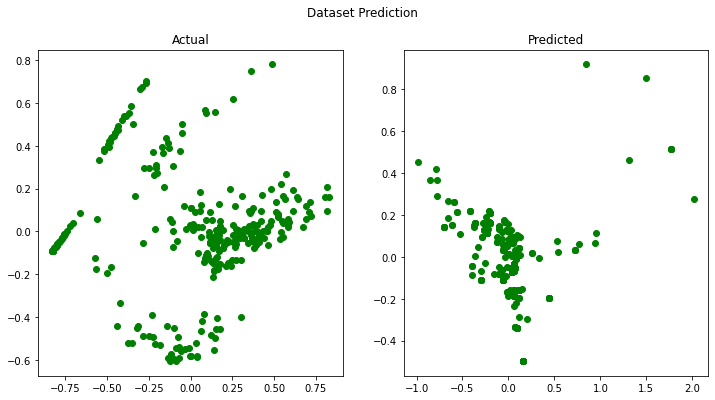

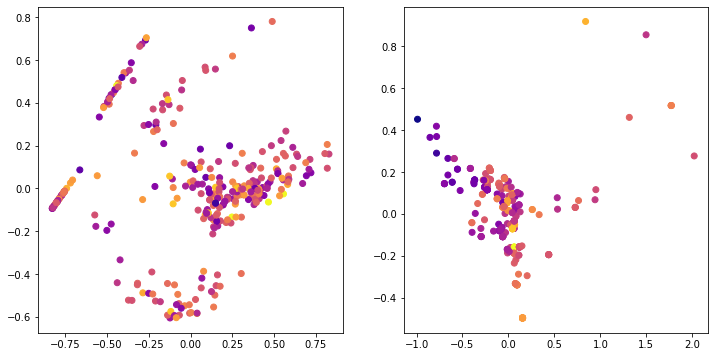

In [53]:
fig, axis = plt.subplots(figsize=(12, 6))
fig.suptitle('Dataset Prediction')
plt.subplot(1, 2, 1)
plt.title('Actual')
pca_plot(mod2_sample.to_numpy(), color='green')
plt.subplot(1, 2, 2)
plt.title('Predicted')
pca_plot(pipeline_output, color='green')

# Annotated by var
import matplotlib.cm as cm
color = mod2_sample['PAYROLL_PROCEED']
color = mod1_sample.iloc[:, 0]
fig, axis = plt.subplots(figsize=(12, 6))
plt.subplot(1, 2, 1)
pca_plot(mod2_sample.to_numpy(), c=color, cmap=cm.plasma)
plt.subplot(1, 2, 2)
pca_plot(pipeline_output, c=color, cmap=cm.plasma)

In [33]:
mod1_sample

,90% CI Upper Bound,90% CI Upper Bound,90% CI Upper Bound,90% CI Upper Bound,90% CI Upper Bound,90% CI Upper Bound,90% CI Upper Bound,90% CI Lower Bound,90% CI Lower Bound,90% CI Lower Bound,90% CI Lower Bound,90% CI Lower Bound,90% CI Lower Bound,"Poverty Percent, All Ages","Poverty Estimate, Age 0-17","Poverty Percent, Age 0-17","Poverty Estimate, Age 5-17 in Families","Poverty Percent, Age 5-17 in Families",Median Household Income
811,0.791817,0.654115,0.789060,0.733452,0.791747,0.794011,0.367179,0.719635,0.781594,0.807082,0.779446,0.854876,0.405089,0.701839,0.785059,0.763127,0.785960,0.808792,0.385509
11294,0.788000,0.410827,0.771437,0.508143,0.772449,0.559303,0.699262,0.461437,0.763474,0.588044,0.758461,0.613835,0.716962,0.465612,0.767227,0.536458,0.766026,0.563056,0.707827
5195,0.546328,0.530405,0.531393,0.602077,0.534347,0.646162,0.440022,0.519825,0.517066,0.622907,0.506007,0.609901,0.429876,0.555901,0.524907,0.610161,0.522925,0.612492,0.434967
4975,0.471856,0.480904,0.457978,0.529793,0.462551,0.581439,0.498740,0.439285,0.437774,0.521099,0.424912,0.500484,0.473694,0.501313,0.449332,0.526453,0.447931,0.527119,0.486607
5337,0.525065,0.458071,0.499592,0.520417,0.503628,0.569356,0.523026,0.448231,0.487280,0.550918,0.479636,0.541860,0.509416,0.490796,0.494001,0.533008,0.493879,0.531870,0.516428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807,0.677850,0.440759,0.683747,0.569059,0.688566,0.643754,0.485470,0.469394,0.676067,0.654313,0.673983,0.683011,0.506315,0.500000,0.679583,0.603158,0.681873,0.630677,0.495383
135,0.609650,0.525571,0.552715,0.501557,0.549187,0.537472,0.497939,0.553564,0.536331,0.524252,0.513764,0.485710,0.482595,0.562813,0.545530,0.522983,0.535292,0.485135,0.490266
9653,0.632229,0.464002,0.619278,0.529882,0.622740,0.579341,0.562503,0.478456,0.605556,0.570679,0.597068,0.563126,0.560079,0.503177,0.613062,0.550538,0.612329,0.556327,0.561231
2348,0.585008,0.526420,0.565056,0.594969,0.568978,0.644513,0.445362,0.526097,0.554927,0.632029,0.549641,0.638872,0.432774,0.556819,0.560594,0.613237,0.561285,0.625148,0.439519
